In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
label_dict = {
    0: 'અ', 1: 'આ', 2: 'ઇ', 3: 'ઈ', 4: 'ઉ', 5: 'ઊ', 6: 'ઋ', 7: 'એ', 8: 'ઐ', 9: 'ઓ', 10: 'ઔ', 11: 'અં',
    12: 'ક', 13: 'કા', 14: 'કિ', 15: 'કી', 16: 'કુ', 17: 'કૂ', 18: 'કે', 19: 'કૈ', 20: 'કો', 21: 'કૌ', 22: 'કં', 23: 'કઃ',
    24: 'ખ', 25: 'ખા', 26: 'ખિ', 27: 'ખી', 28: 'ખુ', 29: 'ખૂ', 30: 'ખે', 31: 'ખૈ', 32: 'ખો', 33: 'ખૌ', 34: 'ખં', 35: 'ખઃ',
    36: 'ગ', 37: 'ગા', 38: 'ગિ', 39: 'ગી', 40: 'ગુ', 41: 'ગૂ', 42: 'ગે', 43: 'ગૈ', 44: 'ગો', 45: 'ગૌ', 46: 'ગં', 47: 'ગઃ',
    48: 'ઘ', 49: 'ઘા', 50: 'ઘિ', 51: 'ઘી', 52: 'ઘુ', 53: 'ઘૂ', 54: 'ઘે', 55: 'ઘૈ', 56: 'ઘો', 57: 'ઘૌ', 58: 'ઘં', 59: 'ઘઃ',
    60: 'ચ', 61: 'ચા', 62: 'ચિ', 63: 'ચી', 64: 'ચુ', 65: 'ચૂ', 66: 'ચે', 67: 'ચૈ', 68: 'ચો', 69: 'ચૌ', 70: 'ચં', 71: 'ચઃ',
    72: 'છ', 73: 'છા', 74: 'છિ', 75: 'છી', 76: 'છુ', 77: 'છૂ', 78: 'છે', 79: 'છૈ', 80: 'છો', 81: 'છૌ', 82: 'છં', 83: 'છઃ',
    84: 'જ', 85: 'જા', 86: 'જિ', 87: 'જી', 88: 'જુ', 89: 'જૂ', 90: 'જે', 91: 'જૈ', 92: 'જો', 93: 'જૌ', 94: 'જં', 95: 'જઃ',
    96: 'ઝ', 97: 'ઝા', 98: 'ઝિ', 99: 'ઝી', 100: 'ઝુ', 101: 'ઝૂ', 102: 'ઝે', 103: 'ઝૈ', 104: 'ઝો', 105: 'ઝૌ', 106: 'ઝં', 107: 'ઝઃ',
    108: 'ટ', 109: 'ટા', 110: 'ટિ', 111: 'ટી', 112: 'ટુ', 113: 'ટૂ', 114: 'ટે', 115: 'ટૈ', 116: 'ટો', 117: 'ટૌ', 118: 'ટં', 119: 'ટઃ',
    120: 'ઠ', 121: 'ઠા', 122: 'ઠિ', 123: 'ઠી', 124: 'ઠુ', 125: 'ઠૂ', 126: 'ઠે', 127: 'ઠૈ', 128: 'ઠો', 129: 'ઠૌ', 130: 'ઠં', 131: 'ઠઃ',
    132: 'ડ', 133: 'ડા', 134: 'ડિ', 135: 'ડી', 136: 'ડુ', 137: 'ડૂ', 138: 'ડે', 139: 'ડૈ', 140: 'ડો', 141: 'ડૌ', 142: 'ડં', 143: 'ડઃ',
    144: 'ઢ', 145: 'ઢા', 146: 'ઢિ', 147: 'ઢી', 148: 'ઢુ', 149: 'ઢૂ', 150: 'ઢે', 151: 'ઢૈ', 152: 'ઢો', 153: 'ઢૌ', 154: 'ઢં', 155: 'ઢઃ',
    156: 'ણ', 157: 'ણા', 158: 'ણિ', 159: 'ણી', 160: 'ણુ', 161: 'ણૂ', 162: 'ણે', 163: 'ણૈ', 164: 'ણો', 165: 'ણૌ', 166: 'ણં', 167: 'ણઃ',
    168: 'ત', 169: 'તા', 170: 'તિ', 171: 'તી', 172: 'તુ', 173: 'તૂ', 174: 'તે', 175: 'તૈ', 176: 'તો', 177: 'તૌ', 178: 'તં', 179: 'તઃ',
    180: 'થ', 181: 'થા', 182: 'થિ', 183: 'થી', 184: 'થુ', 185: 'થૂ', 186: 'થે', 187: 'થૈ', 188: 'થો', 189: 'થૌ', 190: 'થં', 191: 'થઃ',
    192: 'દ', 193: 'દા', 194: 'દિ', 195: 'દી', 196: 'દુ', 197: 'દૂ', 198: 'દે', 199: 'દૈ', 200: 'દો', 201: 'દૌ', 202: 'દં', 203: 'દઃ',
    204: 'ધ', 205: 'ધા', 206: 'ધિ', 207: 'ધી', 208: 'ધુ', 209: 'ધૂ', 210: 'ધે', 211: 'ધૈ', 212: 'ધો', 213: 'ધૌ', 214: 'ધં', 215: 'ધઃ',
    216: 'ન', 217: 'ના', 218: 'નિ', 219: 'ની', 220: 'નુ', 221: 'નૂ', 222: 'ને', 223: 'નૈ', 224: 'નો', 225: 'નૌ', 226: 'નં', 227: 'નઃ',
    228: 'પ', 229: 'પા', 230: 'પિ', 231: 'પી', 232: 'પુ', 233: 'પૂ', 234: 'પે', 235: 'પૈ', 236: 'પો', 237: 'પૌ', 238: 'પં', 239: 'પઃ',
    240: 'ફ', 241: 'ફા', 242: 'ફિ', 243: 'ફી', 244: 'ફુ', 245: 'ફૂ', 246: 'ફે', 247: 'ફૈ', 248: 'ફો', 249: 'ફૌ', 250: 'ફં', 251: 'ફઃ',
    252: 'બ', 253: 'બા', 254: 'બિ', 255: 'બી', 256: 'બુ', 257: 'બૂ', 258: 'બે', 259: 'બૈ', 260: 'બો', 261: 'બૌ', 262: 'બં', 263: 'બઃ',
    264: 'ભ', 265: 'ભા', 266: 'ભિ', 267: 'ભી', 268: 'ભુ', 269: 'ભૂ', 270: 'ભે', 271: 'ભૈ', 272: 'ભો', 273: 'ભૌ', 274: 'ભં', 275: 'ભઃ',
    276: 'મ', 277: 'મા', 278: 'મિ', 279: 'મી', 280: 'મુ', 281: 'મૂ', 282: 'મે', 283: 'મૈ', 284: 'મો', 285: 'મૌ', 286: 'મં', 287: 'મઃ',
    288: 'ય', 289: 'યા', 290: 'યિ', 291: 'યી', 292: 'યુ', 293: 'યૂ', 294: 'યે', 295: 'યૈ', 296: 'યો', 297: 'યૌ', 298: 'યં', 299: 'યઃ',
    300: 'ર', 301: 'રા', 302: 'રિ', 303: 'રી', 304: 'રુ', 305: 'રૂ', 306: 'રે', 307: 'રૈ', 308: 'રો', 309: 'રૌ', 310: 'રં', 311: 'રઃ',
    312: 'લ', 313: 'લા', 314: 'લિ', 315: 'લી', 316: 'લુ', 317: 'લૂ', 318: 'લે', 319: 'લૈ', 320: 'લો', 321: 'લૌ', 322: 'લં', 323: 'લઃ',
    324: 'વ', 325: 'વા', 326: 'વિ', 327: 'વી', 328: 'વુ', 329: 'વૂ', 330: 'વે', 331: 'વૈ', 332: 'વો', 333: 'વૌ', 334: 'વં', 335: 'વઃ',
    336: 'શ', 337: 'શા', 338: 'શિ', 339: 'શી', 340: 'શુ', 341: 'શૂ', 342: 'શે', 343: 'શૈ', 344: 'શો', 345: 'શૌ', 346: 'શં', 347: 'શઃ',
    348: 'ષ', 349: 'ષા', 350: 'ષિ', 351: 'ષી', 352: 'ષુ', 353: 'ષૂ', 354: 'ષે', 355: 'ષૈ', 356: 'ષો', 357: 'ષૌ', 358: 'ષં', 359: 'ષઃ',
    360: 'સ', 361: 'સા', 362: 'સિ', 363: 'સી', 364: 'સુ', 365: 'સૂ', 366: 'સે', 367: 'સૈ', 368: 'સો', 369: 'સૌ', 370: 'સં', 371: 'સઃ',
    372: 'હ', 373: 'હા', 374: 'હિ', 375: 'હી', 376: 'હુ', 377: 'હૂ', 378: 'હે', 379: 'હૈ', 380: 'હો', 381: 'હૌ', 382: 'હં', 383: 'હઃ',
    384: 'ળ', 385: 'ળા', 386: 'ળિ', 387: 'ળી', 388: 'ળુ', 389: 'ળૂ', 390: 'ળે', 391: 'ળૈ', 392: 'ળો', 393: 'ળૌ', 394: 'ળં', 395: 'ળઃ',
    396: 'ક્ષ', 397: 'ક્ષા', 398: 'ક્ષિ', 399: 'ક્ષી', 400: 'ક્ષુ', 401: 'ક્ષૂ', 402: 'ક્ષે', 403: 'ક્ષૈ', 404: 'ક્ષો', 405: 'ક્ષૌ', 406: 'ક્ષં', 407: 'ક્ષઃ',
    408: 'ત્ર', 409: 'ત્રા', 410: 'ત્રિ', 411: 'ત્રી', 412: 'ત્રુ', 413: 'ત્રૂ', 414: 'ત્રે', 415: 'ત્રૈ', 416: 'ત્રો', 417: 'ત્રૌ', 418: 'ત્રં', 419: 'ત્રઃ',
    420: 'જ્ઞ', 421: 'જ્ઞા', 422: 'જ્ઞિ', 423: 'જ્ઞી', 424: 'જ્ઞુ', 425: 'જ્ઞૂ', 426: 'જ્ઞે', 427: 'જ્ઞૈ', 428: 'જ્ઞો', 429: 'જ્ઞૌ', 430: 'જ્ઞં', 431: 'જ્ઞઃ'
}

## Using image_dataset_from_directory for image loading and laebelling with folder's index

In [4]:
train_ds = image_dataset_from_directory(
    "dataset/train",
    image_size=(256,256),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical",
    shuffle=True
)

val_ds = image_dataset_from_directory(
    "dataset/val",
    image_size=(256,256),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical",
    shuffle=False
)


Found 2481 files belonging to 432 classes.
Found 851 files belonging to 432 classes.


## Checking the index is in correct order that we need so labelling is in order
as label = index, so we need it to take in the folders in correct sorted way...

In [9]:
class_names = train_ds.class_names

print(class_names[:10])
print(class_names[10:20])
print(class_names[-5:])


['000', '001', '002', '003', '004', '005', '006', '007', '008', '009']
['010', '011', '012', '013', '014', '015', '016', '017', '018', '019']
['427', '428', '429', '430', '431']


In [10]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)
    print(labels[:10])


(32, 256, 256, 1)
(32, 432)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10, 432), dtype=float32)


In [11]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_ds))

for i in range(5):
    label = labels[i].numpy()
    folder = class_names[label]
    char = label_dict[label]

    plt.imshow(images[i].numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label} | Folder: {folder} | Char: {char}")
    plt.axis("off")
    plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

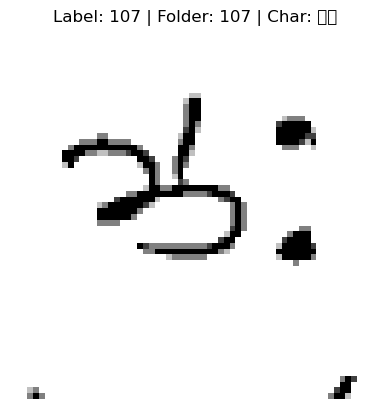

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2734 (\N{GUJARATI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


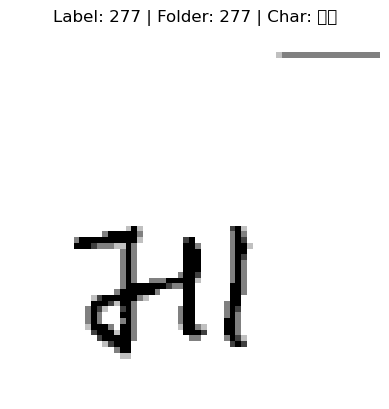

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2722 (\N{GUJARATI LETTER DDHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


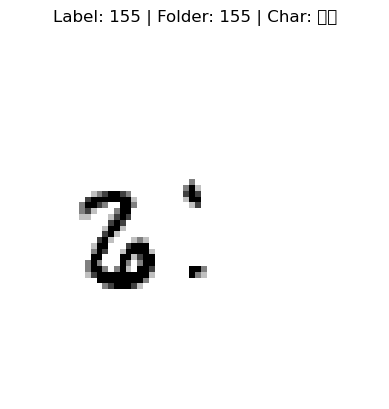

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2728 (\N{GUJARATI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2760 (\N{GUJARATI VOWEL SIGN AI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


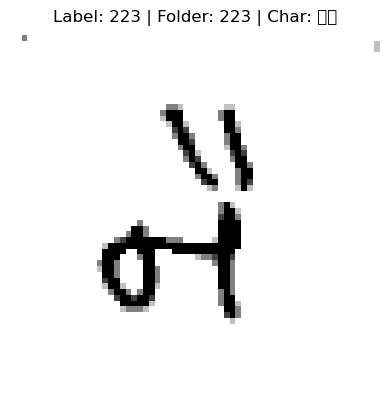

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2752 (\N{GUJARATI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


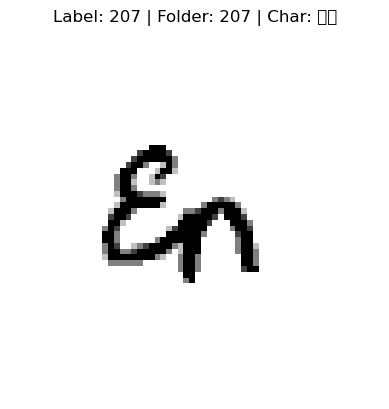

In [10]:
import matplotlib.pyplot as plt

images, labels = next(iter(val_ds))

for i in range(5):
    label = labels[i].numpy()
    folder = class_names[label]
    char = label_dict[label]

    plt.imshow(images[i].numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label} | Folder: {folder} | Char: {char}")
    plt.axis("off")
    plt.show()


## Normalizing images

In [11]:
train_ds = train_ds.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)
)

val_ds = val_ds.map(
    lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)
)

In [12]:
for x, y in train_ds.take(1):
    print(x.dtype)
    print(tf.reduce_min(x).numpy(), tf.reduce_max(x).numpy())


<dtype: 'float32'>
0.0 1.0


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(tf.data.AUTOTUNE)


In [14]:
images, labels = next(iter(train_ds))
print(labels.numpy())


[293 103  59 208 348 367  64 233 419 230 370 395  45  41  75 203 254  97
 357 279 216 119  89 255 425 121  32 257 104 345 416  40]


In [15]:
images.shape

TensorShape([32, 64, 64, 1])

In [16]:
labels.shape

TensorShape([32])

In [17]:
images[0]

<tf.Tensor: shape=(64, 64, 1), dtype=float32, numpy=
array([[[0.5],
        [0.5],
        [0.5],
        ...,
        [1. ],
        [1. ],
        [1. ]],

       [[1. ],
        [1. ],
        [1. ],
        ...,
        [1. ],
        [1. ],
        [1. ]],

       [[1. ],
        [1. ],
        [1. ],
        ...,
        [1. ],
        [1. ],
        [1. ]],

       ...,

       [[1. ],
        [1. ],
        [1. ],
        ...,
        [1. ],
        [1. ],
        [1. ]],

       [[1. ],
        [1. ],
        [1. ],
        ...,
        [1. ],
        [1. ],
        [1. ]],

       [[1. ],
        [1. ],
        [1. ],
        ...,
        [1. ],
        [1. ],
        [1. ]]], dtype=float32)>

301 is 'રા','ra', in label_dict

## Neural Network Defining

In [27]:
#model = tf.keras.Sequential()

In [19]:
# output_class = 432
# model.add(layers.Input(shape=(64,64,1)))

# model.add(layers.Conv2D( filters=32, kernel_size=(3,3),padding='same',activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2, 2)))

# model.add(layers.Conv2D( filters=64, kernel_size=(3,3),padding='same',activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2, 2)))

# model.add(layers.Conv2D( filters=128, kernel_size=(3,3),padding='same',activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2, 2))) 

# model.add(layers.Flatten())
          
# model.add(layers.Dense(256, activation="relu"))
# model.add(layers.Dropout(0.5))
          
# model.add(layers.Dense(432, activation="softmax"))          

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])


In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape=(64,64,1)),

    data_augmentation,   # 👈 only active during training

    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation="relu",
                 kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.Dropout(0.5),

    layers.Dense(432, activation="softmax")
])


In [28]:
model = tf.keras.Sequential([
    layers.Input(shape=(64,64,1)),

    layers.Conv2D(32, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(
        256,
        activation="relu",
        kernel_regularizer=tf.keras.regularizers.l2(1e-4)
    ),
    layers.Dropout(0.5),

    layers.Dense(432, activation="softmax")
])


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 432)                 │         111,024 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,324,784 (16.50 MB)

 Trainable params: 4,324,592 (16.50 MB)

 Non-trainable params: 192 (768.00 B)

In [31]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    verbose='auto',
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 8.0613e-04 - loss: 6.3230 - val_accuracy: 0.0024 - val_loss: 6.1199
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 4.0306e-04 - loss: 6.1195 - val_accuracy: 0.0024 - val_loss: 6.1155
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 4.0306e-04 - loss: 6.1147 - val_accuracy: 0.0024 - val_loss: 6.1113
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.0024 - loss: 6.1155 - val_accuracy: 0.0024 - val_loss: 6.1078
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 8.0613e-04 - loss: 6.1088 - val_accuracy: 0.0035 - val_loss: 6.1056
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.0028 - loss: 6.1057 - val_accuracy: 0.0035 - val_loss: 6.1029
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.0016 - loss: 6.1028 - val_accuracy: 0.0035 - val_loss: 6.1005
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.0016 - loss: 6.1069 - val_ac

In [26]:

for images, labels in val_ds.take(1):
    preds = model.predict(images)
    print("True:", labels[:10].numpy())
    print("Pred:", tf.argmax(preds, axis=1)[:10].numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
True: [395 367 175 261 243  44  36  59 400 353]
Pred: [394 402 355 260 249 259 109  58 235  29]


## after 50 epochs without any overfitting precautions, its random guessing...

In [33]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    print("True:", labels[:10].numpy())
    print("Pred:", tf.argmax(preds, axis=1)[:10].numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
True: [395 367 175 261 243  44  36  59 400 353]
Pred: [0 0 0 0 0 0 0 0 0 0]


## with batch norm & regularization it can't learn anything, data too small and 400+ classes...